# Метод опорных веторов (Заданий 1)
Обучите классификатор **LinearSVC()** при **C = 0.65** и **random_state = 12** на предложенной выборке. Используйте параметр **random_state = 12** для разделения выборки на тренировочную и тестовую части, в отношении **75/25** функции **train_test_split()**.

1. Введите значение коэффициента $\theta_{386}$  построенной гиперплоскости.
2. Введите значение коэффициента $\theta_{476}$  построенной гиперплоскости.
3. Введите значение коэффициента $\theta_{168}$  построенной гиперплоскости.
4. Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики $F_{1}$  для каждого класса: $F_{1} = 2 * \frac{precision * recall}{precision + recall}$
5. Введите среднее значение метрик $F_{1}$ ($Macro-F1$):
6. Выполните предсказание для изображений, указанных ниже. Введите назначенный класс: 0 или 1.


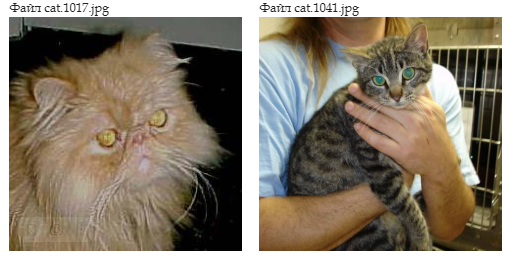

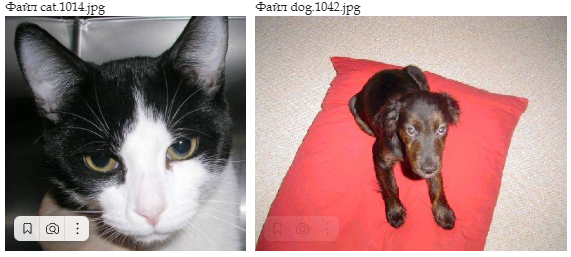

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import cv2
from imutils import paths
import os

os.chdir(r'/content/drive/MyDrive/train')

imagePaths = sorted(list(paths.list_images('train')))


def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()


X = np.zeros( (512) )
Y1 = np.zeros( (500) )
Y2 = np.ones( (500) )
Y = np.concatenate((Y1, Y2), axis=0)

for filename in os.listdir(r'/content/drive/MyDrive/train'):
    if filename[filename.rfind(".") + 1:] in ['jpg']:
        image = cv2.imread(filename)
        new_row = extract_histogram(image)
        X = np.vstack([X, new_row])

X = np.delete(X, (0), axis=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=12)

clf = LinearSVC(C=0.65, random_state=12).fit(X_train, Y_train)

w = clf.coef_[0]

print(f'Коэф. под номером 168 = {np.around(clf.coef_[0][167], 2)}')
print(f'Коэф. под номером 386 = {np.around(clf.coef_[0][385], 2)}')
print(f'Коэф. под номером 476 = {np.around(clf.coef_[0][475], 2)}')

con_mat = confusion_matrix(clf.predict(X_test), Y_test.reshape(-1, 1))


TPR1 = con_mat[1, 1] / (con_mat[1, 1] + con_mat[0, 1])
Precision1 = con_mat[1, 1] / (con_mat[1, 1] + con_mat[1, 0])
TPR2 = con_mat[0, 0] / (con_mat[0, 0] + con_mat[1, 0])
Precision2 = con_mat[0, 0] / (con_mat[0, 0] + con_mat[0, 1])

F1 = 2 * Precision1 * TPR1 / (Precision1 + TPR1)
F2 = 2 * Precision2 * TPR2 / (Precision2 + TPR2)

print(f'Cредняя F-мера = {np.around((F1 + F2) / 2, 2)}')

os.chdir(r'/content/drive/MyDrive/test')

image1 = cv2.imread('cat.1017.jpg')
image2 = cv2.imread('cat.1041.jpg')
image3 = cv2.imread('cat.1014.jpg')
image4 = cv2.imread('dog.1042.jpg')

hst1 = extract_histogram(image1)
hst2 = extract_histogram(image2)
hst3 = extract_histogram(image3)
hst4 = extract_histogram(image4)

print(f'Предсказание для картинки cat.1017.jpg = {clf.predict(hst1.reshape(1, -1))}')
print(f'Предсказание для картинки cat.1041.jpg = {clf.predict(hst2.reshape(1, -1))}')
print(f'Предсказание для картинки cat.1014.jpg = {clf.predict(hst3.reshape(1, -1))}')
print(f'Предсказание для картинки dog.1042.jpg = {clf.predict(hst4.reshape(1, -1))}')


Коэф. под номером 168 = 0.07
Коэф. под номером 386 = 0.0
Коэф. под номером 476 = 0.0
Cредняя F-мера = 0.57
Предсказание для картинки cat.1017.jpg = [0.]
Предсказание для картинки cat.1041.jpg = [1.]
Предсказание для картинки cat.1014.jpg = [0.]
Предсказание для картинки dog.1042.jpg = [0.]
